# Differentiable Cosmological Simulation with Adjoint Method

In [1]:
import os

# change JAX GPU memory preallocation fraction
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.99'

# !nvidia-smi --query-gpu=gpu_name --format=csv,noheader

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from pmwd import (
    Configuration,
    Cosmology, SimpleLCDM,
    boltzmann,
    white_noise, linear_modes,
    lpt,
    nbody,
    scatter,
)
from pmwd.vis_util import plt_2d

## Reproducibility

GPU can output different results for identical inputs. We compare the relative difference of particle displacements and velocities, with respect to their respective std, between 2 runs.

In [3]:
def check_reproducibility(
        ptcl_spacing,
        mesh_shape,
        a_nbody_maxstep,
        float_dtype,
        ptcl_grid_shape=(384,) * 3,
        seed=0,
    ):
    conf = Configuration(
        ptcl_spacing,
        ptcl_grid_shape,
        mesh_shape=mesh_shape,
        a_nbody_maxstep=a_nbody_maxstep,
        float_dtype=float_dtype,
    )
    cosmo = SimpleLCDM(conf)
    modes = white_noise(seed, conf)

    p1, _ = model(modes, cosmo, conf)
    p2, _ = model(modes, cosmo, conf)
    print(f'{float_dtype}, {conf.a_nbody_num:3}, {mesh_shape**3}, {cosmo.ptcl_mass:.0f}'
          f': {(p1.disp - p2.disp).std() / p1.disp.std():.1e}'
          f', {(p1.vel - p2.vel).std() / p1.vel.std():.1e}')


def model(modes, cosmo, conf):
    cosmo = boltzmann(cosmo, conf)
    modes = linear_modes(modes, cosmo, conf)
    ptcl, obsvbl = lpt(modes, cosmo, conf)
    ptcl, obsvbl = nbody(ptcl, obsvbl, cosmo, conf)
    return ptcl, obsvbl

In [4]:
check_reproducibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f4')
check_reproducibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f4')
check_reproducibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f4')
check_reproducibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f4')
check_reproducibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f4')
check_reproducibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f4')
check_reproducibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f4')
check_reproducibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f4')


KeyboardInterrupt



| precision | time steps | cell/ptcl | ptcl mass $[M_\odot]$ | disp rel diff | vel rel diff |
| --- | --- | --- | --- | --- | --- |
| single | 63 | 1 | 8e10 | 1.1e-7 | 4.5e-7 |
| single | 63 | 1 | 1e10 | 1.4e-7 | 1.5e-6 |
| single | 63 | 8 | 8e10 | 3.1e-7 | 2.4e-6 |
| single | 63 | 8 | 1e10 | 1.6e-6 | 4.8e-5 |
| single | 126 | 1 | 8e10 | 9.9e-8 | 4.4e-7 |
| single | 126 | 1 | 1e10 | 1.3e-7 | 1.4e-6 |
| single | 126 | 8 | 8e10 | 3.1e-7 | 2.3e-6 |
| single | 126 | 8 | 1e10 | 5.1e-7 | 1.3e-5 |

In [4]:
check_reproducibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f8')
check_reproducibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f8')
check_reproducibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f8')
check_reproducibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f8')
check_reproducibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f8')
check_reproducibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f8')
check_reproducibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f8')
check_reproducibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f8')

f8,  63, 1, 8: 1.9e-16, 7.9e-16
f8,  63, 1, 1: 2.4e-16, 2.3e-15
f8,  63, 8, 8: 5.4e-16, 4.1e-15
f8,  63, 8, 1: 1.4e-15, 3.6e-14
f8, 126, 1, 8: 1.8e-16, 7.8e-16
f8, 126, 1, 1: 2.3e-16, 2.3e-15
f8, 126, 8, 8: 5.9e-16, 4.3e-15
f8, 126, 8, 1: 8.3e-16, 1.7e-14


| precision | time steps | cell/ptcl | ptcl mass $[M_\odot]$ | disp rel diff | vel rel diff |
| --- | --- | --- | --- | --- | --- |
| double | 63 | 1 | 8e10 | 1.9e-16 | 7.9e-16 |
| double | 63 | 1 | 1e10 | 2.4e-16 | 2.3e-15 |
| double | 63 | 8 | 8e10 | 5.4e-16 | 4.1e-15 |
| double | 63 | 8 | 1e10 | 1.4e-15 | 3.6e-14 |
| double | 126 | 1 | 8e10 | 1.8e-16 | 7.8e-16 |
| double | 126 | 1 | 1e10 | 2.3e-16 | 2.3e-15 |
| double | 126 | 8 | 8e10 | 5.9e-16 | 4.3e-15 |
| double | 126 | 8 | 1e10 | 8.3e-16 | 1.7e-14 |

## Reversibility

Model differentiation evolves the adjoint equations backward in time. To save memory, trajectory of the model state in the forward run is not saved, but re-simulated together with the adjoint equations. Even though in principle the N-body systems are reversible, in practice the re-simulated trajectory can differ from the forward one due to loss of information.

We compare the relative difference of particle displacements and velocities, with respect to their respective std, between particles from the LPT initial conditions (z=63) and those that have evolved forward to the final time (z=0) and then backward.

In [5]:
def check_reversibility(
        ptcl_spacing,
        mesh_shape,
        a_nbody_maxstep,
        float_dtype,
        ptcl_grid_shape=(384,) * 3,
        seed=0,
    ):
    conf = Configuration(
        ptcl_spacing,
        ptcl_grid_shape,
        mesh_shape=mesh_shape,
        a_nbody_maxstep=a_nbody_maxstep,
        float_dtype=float_dtype,
    )
    cosmo = SimpleLCDM(conf)
    modes = white_noise(seed, conf)

    cosmo = boltzmann(cosmo, conf)
    modes = linear_modes(modes, cosmo, conf)
    p0, obsvbl = lpt(modes, cosmo, conf)

    p1, obsvbl = nbody(p0, obsvbl, cosmo, conf)
    p1, _ = nbody(p1, obsvbl, cosmo, conf, reverse=True)
    print(f'{float_dtype}, {conf.a_nbody_num:3}, {mesh_shape**3}, {cosmo.ptcl_mass:.0f}'
          f': {(p1.disp - p0.disp).std() / p0.disp.std():.1e}'
          f', {(p1.vel - p0.vel).std() / p0.vel.std():.1e}')

In [4]:
check_reversibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f4')
check_reversibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f4')
check_reversibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f4')
check_reversibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f4')
check_reversibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f4')
check_reversibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f4')
check_reversibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f4')
check_reversibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f4')

f4,  63, 1, 8: 4.3e-04, 7.3e-04
f4,  63, 1, 1: 1.4e-03, 2.2e-03
f4,  63, 8, 8: 3.3e-03, 7.6e-03
f4,  63, 8, 1: 5.2e-02, 7.1e-02
f4, 126, 1, 8: 4.4e-04, 6.3e-04
f4, 126, 1, 1: 1.3e-03, 1.7e-03
f4, 126, 8, 8: 3.7e-03, 7.0e-03
f4, 126, 8, 1: 2.1e-02, 3.6e-02


| precision | time steps | cell/ptcl | ptcl mass $[M_\odot]$ | disp rel diff | vel rel diff |
| --- | --- | --- | --- | --- | --- |
| single | 63 | 1 | 8e10 | 4.3e-4 | 7.3e-4 |
| single | 63 | 1 | 1e10 | 1.4e-3 | 2.2e-3 |
| single | 63 | 8 | 8e10 | 3.3e-3 | 7.6e-3 |
| single | 63 | 8 | 1e10 | 5.2e-2 | 7.1e-2 |
| single | 126 | 1 | 8e10 | 4.4e-4 | 6.3e-4 |
| single | 126 | 1 | 1e10 | 1.3e-3 | 1.7e-3 |
| single | 126 | 8 | 8e10 | 3.7e-3 | 7.0e-3 |
| single | 126 | 8 | 1e10 | 2.1e-2 | 3.6e-2 |

In [4]:
check_reversibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f8')
check_reversibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/64, float_dtype='f8')
check_reversibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f8')
check_reversibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/64, float_dtype='f8')
check_reversibility(ptcl_spacing=1., mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f8')
check_reversibility(ptcl_spacing=.5, mesh_shape=1, a_nbody_maxstep=1/128, float_dtype='f8')
check_reversibility(ptcl_spacing=1., mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f8')
check_reversibility(ptcl_spacing=.5, mesh_shape=2, a_nbody_maxstep=1/128, float_dtype='f8')

f8,  63, 1, 8: 7.2e-13, 1.2e-12
f8,  63, 1, 1: 2.2e-12, 3.4e-12
f8,  63, 8, 8: 5.8e-12, 1.4e-11
f8,  63, 8, 1: 5.4e-11, 1.3e-10
f8, 126, 1, 8: 6.9e-13, 9.4e-13
f8, 126, 1, 1: 2.1e-12, 2.9e-12
f8, 126, 8, 8: 6.4e-12, 1.2e-11
f8, 126, 8, 1: 3.5e-11, 7.0e-11


| precision | time steps | cell/ptcl | ptcl mass $[M_\odot]$ | disp rel diff | vel rel diff |
| --- | --- | --- | --- | --- | --- |
| double | 63 | 1 | 8e10 | 7.2e-13 | 1.2e-12 |
| double | 63 | 1 | 1e10 | 2.2e-12 | 3.4e-12 |
| double | 63 | 8 | 8e10 | 5.8e-12 | 1.4e-11 |
| double | 63 | 8 | 1e10 | 5.4e-11 | 1.3e-10 |
| double | 126 | 1 | 8e10 | 6.9e-13 | 9.4e-13 |
| double | 126 | 1 | 1e10 | 2.1e-12 | 2.9e-12 |
| double | 126 | 8 | 8e10 | 6.4e-12 | 1.2e-11 |
| double | 126 | 8 | 1e10 | 3.5e-11 | 7.0e-11 |

## A toy problem

In [76]:
from PIL import Image, ImageFont, ImageDraw


text = 'pmwd'
font = ImageFont.truetype('../nova/NovaRoundSlim-BookOblique.ttf', 32)

ptcl_spacing = 10.
ptcl_grid_shape = (16, 27, 16)
mesh_shape = (32, 54, 32)
im_shape = (64, 108)
xy = (52, 28)

im = Image.new('L', im_shape[::-1], 255)
draw = ImageDraw.Draw(im)
draw.text(xy, text, font=font, anchor='mm')

im_tgt = 1 - jnp.asarray(im) / 255  # normalize the image to make the target
# im_tgt *= jnp.prod(jnp.array(ptcl_grid_shape)) / im_tgt.sum()

In [78]:
im_tgt.sum()

DeviceArray(523.988, dtype=float64)

16×27×16=6912 particles, in a 160 × 270 × 160 Mpc$^3/h^3$ box, evolving with a 2× mesh (32×54×32) from $z=63$ to $z=0$ to match the 2D projection to the target image below at 4× resolution (64×108).

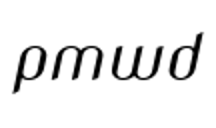

In [64]:
im.resize((216, 128))

In [ ]:
plt_2d()

In [ ]:
scatter

In [67]:
from functools import partial

from jax.example_libraries.optimizers import adam


def model(modes, cosmo, conf):
    modes = linear_modes(modes, cosmo, conf)
    ptcl, obsvbl = lpt(modes, cosmo, conf)
    ptcl, obsvbl = nbody(ptcl, obsvbl, cosmo, conf)
    return ptcl, obsvbl

def scatter_2d(ptcl, conf):
    ptcl = ptcl[:, :2]  # project to first 2 dim
    ptcl = ptcl.replace(pmid=ptcl.pmid*2)  # hack onto a 2x finer mesh
    cell_size = conf.cell_size / 2
    mesh = jnp.zeros(im_shape, dtype=conf.float_dtype)
    mesh = scatter(ptcl, mesh, 1, cell_size=cell_size)
    return mesh

# def plt_pmwd(dens, figsize=(4, 2)):
#     dens = np.asarray(dens)
#     plt.figure(figsize=figsize)
#     plt.imshow(dens)
#     plt.colorbar()
#     plt.xlabel(r'{} Mpc/$h$ $\;\times\;$ {} Mpc/$h$'.format(height, width))
#     plt.xticks([])
#     plt.yticks([])

#     plt.show()
plt_pmwd = partial(plt_2d, figsize=(14, 7), cmap='cividis', norm=None)

def obj(tgt, modes, cosmo, conf):
    ptcl = model(modes, cosmo, conf)
    dens = scatter_2d(ptcl, conf)
    return (dens - tgt).var() / tgt.var()

obj_valgrad = jax.value_and_grad(obj, argnums=1)

# def optim(tgt, modes, cosmo, conf, iters=100, lr=1e-3):
#     tgt = jnp.asarray(tgt)
#     for i in range(iters):
#         value, modes_grad = obj_valgrad(tgt, modes, cosmo, conf)
#         modes = modes - lr * modes_grad.conj()
#     return value, modes

def optim(tgt, modes, cosmo, conf, iters=100, lr=1e-2):
    init, update, get_params = adam(lr)
    state = init(modes)

    def step(step, state, tgt, cosmo, conf):
        modes = get_params(state)
        value, grads = obj_valgrad(tgt, modes, cosmo, conf)
        state = update(step, grads, state)
        return value, state

    tgt = jnp.asarray(tgt)
    for i in range(iters):
        value, state = step(i, state, tgt, cosmo, conf)

    modes = get_params(state)
    return value, modes

In [71]:
conf = Configuration(ptcl_spacing, ptcl_grid_shape, mesh_shape)
cosmo = SimpleLCDM(conf)
seed = 0
modes = white_noise(seed, conf, real=True)
cosmo = boltzmann(cosmo, conf)
modes = linear_modes(modes, cosmo, conf)

2LPT ICs at z=63.

In [72]:
ptcl, obsvbl = lpt(modes, cosmo, conf)
plt_pmwd(scatter_2d(ptcl, conf))

AttributeError: 'DeviceArray' object has no attribute 'mesh_size'

Time integration for 63 steps to z=0.

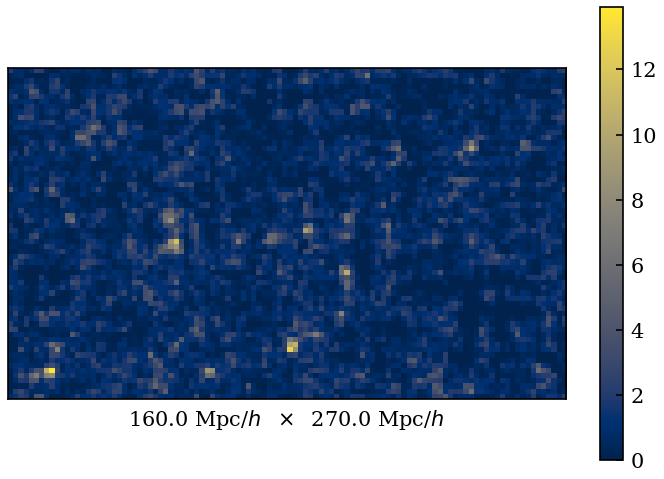

In [23]:
ptcl, obsvbl = nbody(ptcl, obsvbl, cosmo, conf)
plt_pmwd(scatter_2d(ptcl, conf))

## A toy problem

Reverse the arrow of time and integrate backward to z=63.

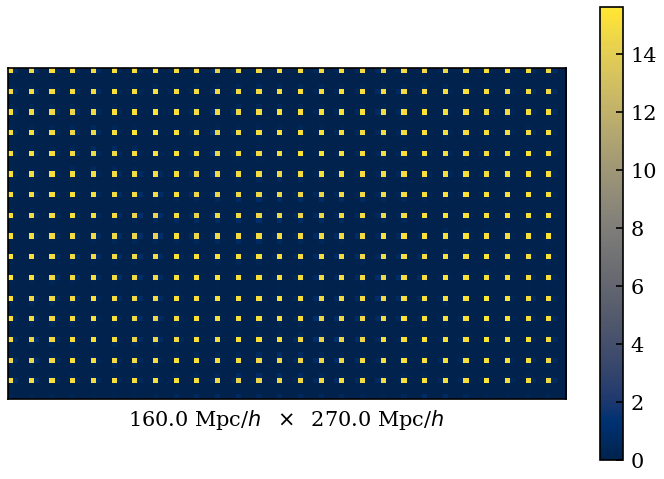

In [24]:
ptcl, obsvbl = nbody(ptcl, obsvbl, cosmo, conf, reverse=True)
plt_pmwd(scatter_2d(ptcl, conf))

After 1 iteration:

In [29]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=1, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(1.127, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.005, dtype=float32))

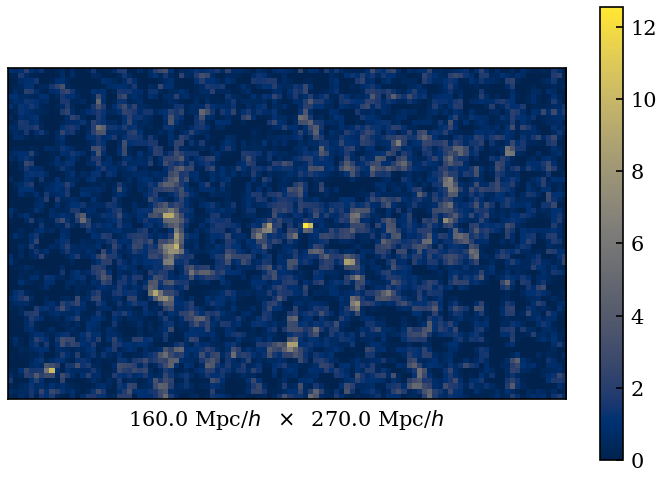

In [30]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

## A toy problem

Optimize for an interesting objective at z=0. After 10 iteration:

In [35]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=10, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(0.77, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.021, dtype=float32))

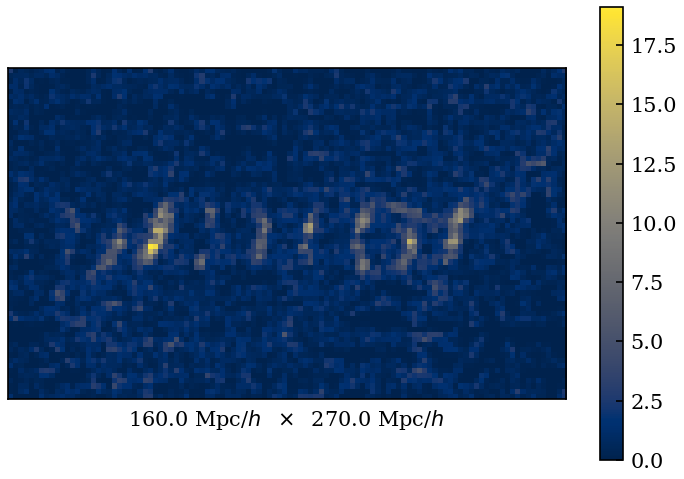

In [36]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

After 100 iteration:

In [39]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=100, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(0.42, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.072, dtype=float32))

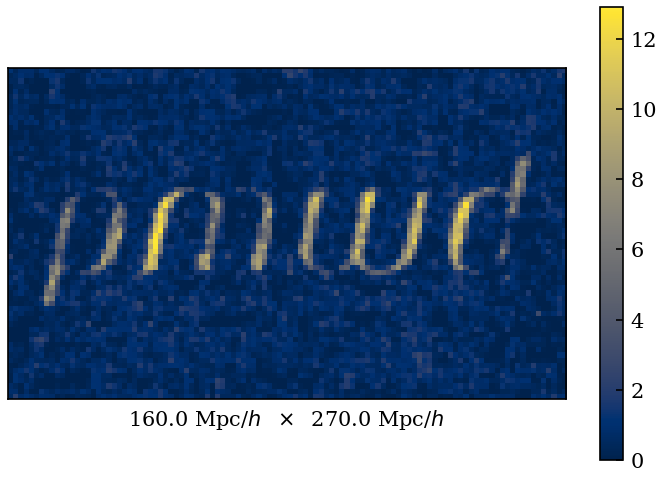

In [40]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

After 300 iteration:

In [41]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=300, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(0.36, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.121, dtype=float32))

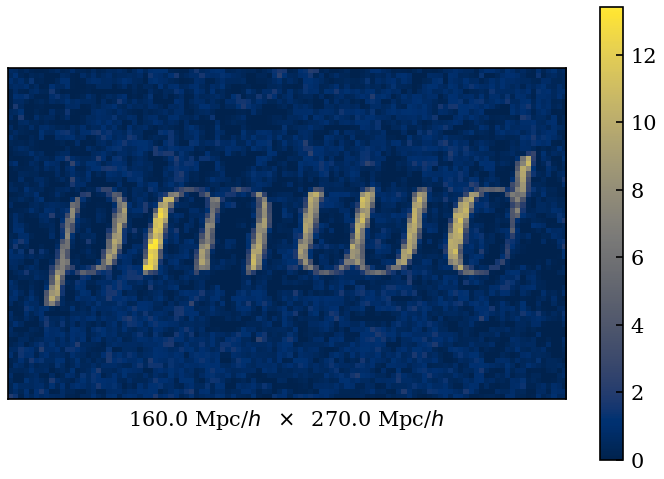

In [42]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

After 1000 iteration:

In [43]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=1000, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(0.315, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.222, dtype=float32))

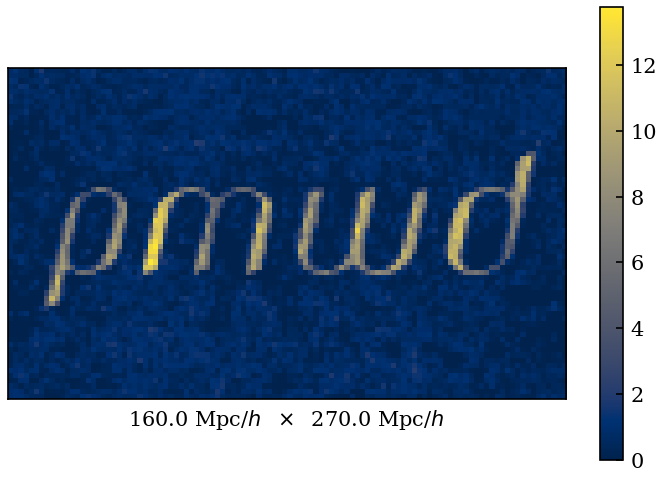

In [44]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

After 3000 iteration:

In [8]:
loss, modes_optim = optim(norm_im, modes, cosmo, conf, iters=3000, lr=0.08)
loss, modes.std(), modes_optim.std()

(DeviceArray(0.289, dtype=float64),
 DeviceArray(1.004, dtype=float32),
 DeviceArray(1.334, dtype=float32))

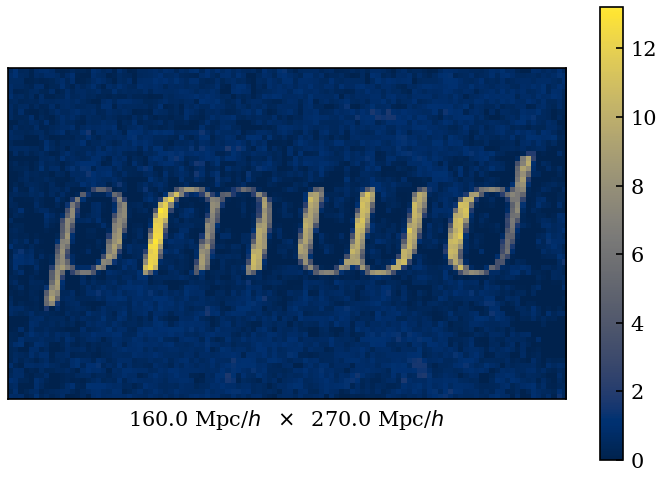

In [9]:
plt_pmwd(scatter_2d(model(modes_optim, cosmo, conf), conf))

In [7]:
from math import floor, log
from functools import reduce, lru_cache

import jax.numpy as jnp

In [8]:
def _next_fft_size(n, radices):
    if n <= max(radices):
        return n

    powers = [radix ** (jnp.arange(1 + floor(log(2*n, radix)))) for radix in radices]
    products = reduce(jnp.kron, powers)
    return products[products >= n].min().item()

In [32]:
_next_fft_size(145, [2, 3, 5, 7])

147

In [4]:
from pmwd import *

print(Configuration(1., (256,) * 3, mesh_shape=1.7, lpt_padded_shape=1.2))

Configuration(ptcl_spacing=1.0,
              ptcl_grid_shape=(256, 256, 256),
              mesh_shape=(441, 441, 441),
              cosmo_dtype=dtype('float64'),
              pmid_dtype=dtype('int16'),
              float_dtype=dtype('float32'),
              k_pivot_Mpc=0.05,
              T_cmb=2.7255,
              M=1.98847e+40,
              L=3.0856775815e+22,
              T=3.0856775815e+17,
              transfer_fit=True,
              transfer_fit_nowiggle=False,
              transfer_size=1024,
              growth_rtol=1.4901161193847656e-08,
              growth_atol=1.4901161193847656e-08,
              lpt_order=2,
              lpt_padded_shape=(315, 315, 315),
              a_start=0.015625,
              a_stop=1.0,
              a_lpt_maxstep=0.0078125,
              a_nbody_maxstep=0.015625,
              chunk_len=16777216)


In [9]:
def f(n):
    return jnp.arange(n//2 + 1), jnp.arange(-(n//2), 0)

In [10]:
f(15)

(DeviceArray([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 DeviceArray([-7, -6, -5, -4, -3, -2, -1], dtype=int64))

In [11]:
f(16)

(DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 DeviceArray([-8, -7, -6, -5, -4, -3, -2, -1], dtype=int64))

In [15]:
import jax